In [ ]:
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade

## Importing Dependencies

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,roc_auc_score,roc_curve
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

#from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score, accuracy_score

# nltk
import nltk
from nltk.corpus import stopwords

# Word2vec
import gensim

# Ensemble models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score


# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import seaborn as sns
import matplotlib.pyplot as plt


# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


## Importing Stopwords

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Settings

In [ ]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

# TEXT CLEANING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Open and Read Dataset. Make sure to include correct pathname

In [ ]:

dataset_path = "/content/drive/MyDrive/AI2-Final Project/training.1600000.processed.noemoticon.csv"
print("Open file:", dataset_path)
df = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

Open file: /content/drive/MyDrive/AI2-Final Project/training.1600000.processed.noemoticon.csv


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



##Extracting a subset from the main dataset due to space constraint

In [ ]:
from sklearn.model_selection import train_test_split
x_train, df2, y_train, df3 = train_test_split(df.iloc[:,1:], df.iloc[:,0:1], test_size=0.125, random_state=19, stratify=df['target'])
df1 = pd.concat([df3, df2], axis = 1)

In [ ]:
df1.shape

(200000, 6)

# Map Label to String

In [ ]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [ ]:
%%time
df1.target = df1.target.apply(lambda x: decode_sentiment(x))

CPU times: user 67.1 ms, sys: 0 ns, total: 67.1 ms
Wall time: 67.9 ms


In [ ]:
df1.head()

,target,ids,date,flag,user,text
513467,NEGATIVE,2190392801,Tue Jun 16 02:35:58 PDT 2009,NO_QUERY,ericaaviles,Yay for Jon and Kate + 8! boo for having to wo...
317873,NEGATIVE,2002701375,Tue Jun 02 04:56:34 PDT 2009,NO_QUERY,janine_j9,@TimothyH2O sorry about last night I would hav...
1106322,POSITIVE,1971410827,Sat May 30 07:02:48 PDT 2009,NO_QUERY,CandisDanielle,Good Morning my Twitter Loves.....Have a wonde...
430836,NEGATIVE,2064416725,Sun Jun 07 06:12:25 PDT 2009,NO_QUERY,Portiaism,@jamesheart24 I am great.. 'Revising' for my l...
1211267,POSITIVE,1989134863,Mon Jun 01 00:27:37 PDT 2009,NO_QUERY,fadedmoon,@AmyyVee wehehehehe sorry.... :| ) So whats new?


## Check distribution of sentiments

Text(0.5, 1.0, 'Dataset labels distribuition')

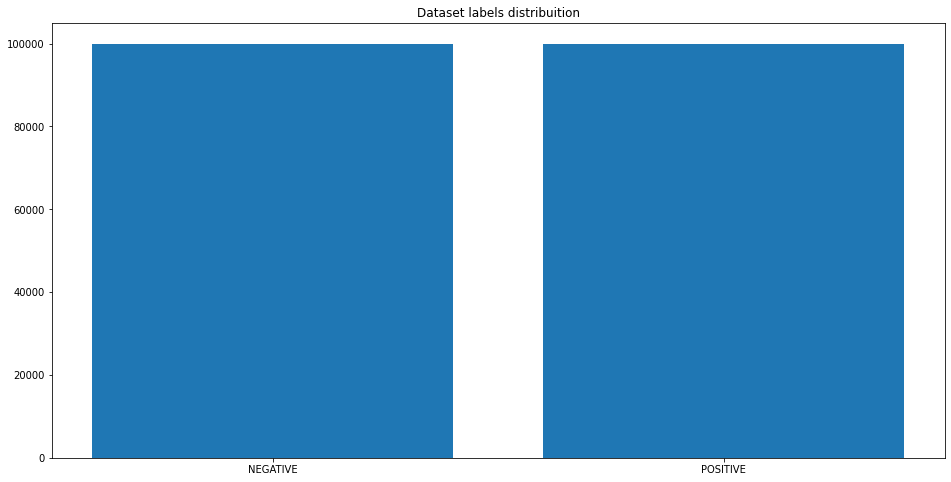

In [ ]:
target_cnt = Counter(df1.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

## Preprocessing the dataset

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

## Text Preprocessing

Lemmatizing

In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def preprocess_lemma(text):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
          tokens.append(lem.lemmatize(token))
            
    return " ".join(tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df1.head()

,target,ids,date,flag,user,text
513467,NEGATIVE,2190392801,Tue Jun 16 02:35:58 PDT 2009,NO_QUERY,ericaaviles,Yay for Jon and Kate + 8! boo for having to wo...
317873,NEGATIVE,2002701375,Tue Jun 02 04:56:34 PDT 2009,NO_QUERY,janine_j9,@TimothyH2O sorry about last night I would hav...
1106322,POSITIVE,1971410827,Sat May 30 07:02:48 PDT 2009,NO_QUERY,CandisDanielle,Good Morning my Twitter Loves.....Have a wonde...
430836,NEGATIVE,2064416725,Sun Jun 07 06:12:25 PDT 2009,NO_QUERY,Portiaism,@jamesheart24 I am great.. 'Revising' for my l...
1211267,POSITIVE,1989134863,Mon Jun 01 00:27:37 PDT 2009,NO_QUERY,fadedmoon,@AmyyVee wehehehehe sorry.... :| ) So whats new?


## Text preprocessing

In [ ]:
%%time
df1['text_clean'] = df1.text.apply(lambda x: preprocess_lemma(x))


CPU times: user 15.8 s, sys: 210 ms, total: 16 s
Wall time: 15.9 s


In [ ]:
%%time
df1['target'] = df1['target'].apply(lambda x: 1 if x =='POSITIVE' else 0)

CPU times: user 76.5 ms, sys: 0 ns, total: 76.5 ms
Wall time: 76.5 ms


In [ ]:
pd.options.display.max_colwidth = int(df1['text'].str.len().max()) + 1
print(df1.iloc[0:5,5:7])

                                                                                                         text  \
513467                                              Yay for Jon and Kate + 8! boo for having to work at 10am    
317873   @TimothyH2O sorry about last night I would have stayed up with you but you weren't here when I left    
1106322                                               Good Morning my Twitter Loves.....Have a wonderful day    
430836                         @jamesheart24 I am great.. 'Revising' for my last exam  you done all of yours?   
1211267                                                     @AmyyVee wehehehehe sorry.... :| ) So whats new?    

                                      text_clean  
513467              yay jon kate 8 boo work 10am  
317873        sorry last night would stayed left  
1106322  good morning twitter love wonderful day  
430836             great revising last exam done  
1211267               wehehehehe sorry whats new  


In [ ]:
df1.shape

(200000, 7)

In [ ]:
df1.head()

,target,ids,date,flag,user,text,text_clean
513467,0,2190392801,Tue Jun 16 02:35:58 PDT 2009,NO_QUERY,ericaaviles,Yay for Jon and Kate + 8! boo for having to wo...,yay jon kate 8 boo work 10am
317873,0,2002701375,Tue Jun 02 04:56:34 PDT 2009,NO_QUERY,janine_j9,@TimothyH2O sorry about last night I would hav...,sorry last night would stayed left
1106322,1,1971410827,Sat May 30 07:02:48 PDT 2009,NO_QUERY,CandisDanielle,Good Morning my Twitter Loves.....Have a wonde...,good morning twitter love wonderful day
430836,0,2064416725,Sun Jun 07 06:12:25 PDT 2009,NO_QUERY,Portiaism,@jamesheart24 I am great.. 'Revising' for my l...,great revising last exam done
1211267,1,1989134863,Mon Jun 01 00:27:37 PDT 2009,NO_QUERY,fadedmoon,@AmyyVee wehehehehe sorry.... :| ) So whats new?,wehehehehe sorry whats new


## Making Utitlity functions for Model diagnostics and comparison

In [ ]:
def plot_auc_roc(model,X_train, X_test, y_train, y_test):

  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Area under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model


def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(x_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


## Check Distribution of words:


In [ ]:
df1_pos = df1.query("target == 'POSITIVE'")
df1_neg = df1.query("target == 'NEGATIVE'")

print(df1_pos.shape, df1_neg.shape)

(100000, 7) (100000, 7)


In [ ]:
words_in_postweet = [tweet.split() for tweet in df1_pos.text_clean]

words_in_negtweet = [tweet.split() for tweet in df1_neg.text_clean]


In [ ]:
import collections

word_pos = list(itertools.chain(*words_in_postweet))
word_neg = list(itertools.chain(*words_in_negtweet))

# Create counter
counts_no_pos = collections.Counter(word_pos)
print(counts_no_pos.most_common(15))

counts_no_neg = collections.Counter(word_neg)
print(counts_no_neg.most_common(15))

[('good', 7811), ('day', 7142), ('love', 6310), ('quot', 5761), ('u', 4933), ('like', 4873), ('get', 4782), ('thanks', 4419), ('lol', 4406), ('time', 4373), ('going', 3944), ('today', 3925), ('go', 3735), ('one', 3556), ('got', 3496)]
[('day', 6507), ('go', 6240), ('get', 5940), ('work', 5895), ('like', 5101), ('today', 4835), ('want', 4347), ('got', 4252), ('going', 4224), ('back', 4054), ('miss', 4011), ('really', 3981), ('im', 3807), ('time', 3799), ('u', 3787)]


In [ ]:
counts_no_pos_df = pd.DataFrame(counts_no_pos.most_common(15),
                             columns=['words', 'count'])

counts_no_pos_df.head()

,words,count
0,good,7811
1,day,7142
2,love,6310
3,quot,5761
4,u,4933


In [ ]:
counts_no_neg_df = pd.DataFrame(counts_no_neg.most_common(15),
                             columns=['words', 'count'])

counts_no_neg_df.head()

,words,count
0,day,6507
1,go,6240
2,get,5940
3,work,5895
4,like,5101


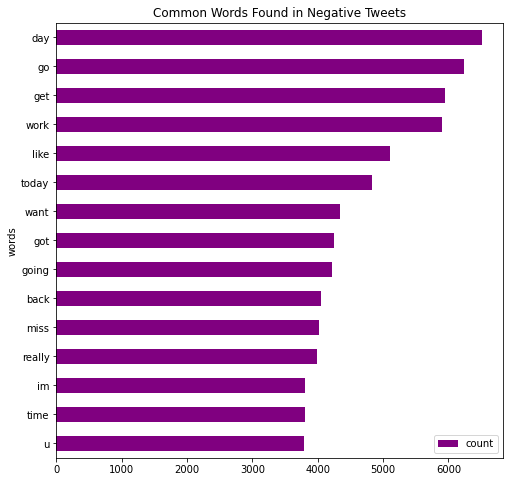

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
counts_no_neg_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Negative Tweets")

plt.show()

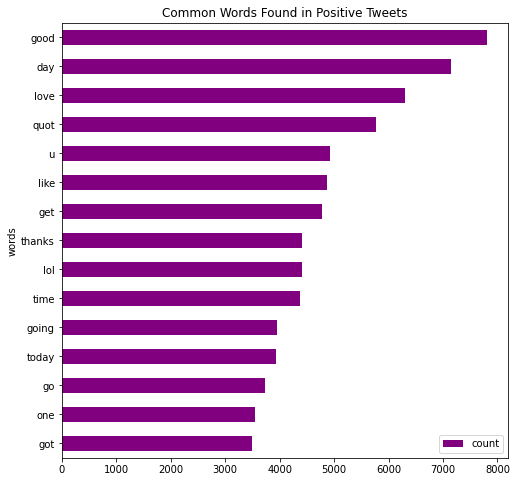

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
counts_no_pos_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Positive Tweets")

plt.show()

### TF-IDF

In [ ]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df1.text_clean)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df1['target'],test_size=0.3,random_state=42)


In [ ]:
x_train.shape

(140000, 83377)

## Adaboost

Adaboost base model

              precision    recall  f1-score   support

           0       0.78      0.43      0.55     29837
           1       0.61      0.88      0.72     30163

    accuracy                           0.65     60000
   macro avg       0.69      0.65      0.63     60000
weighted avg       0.69      0.65      0.63     60000



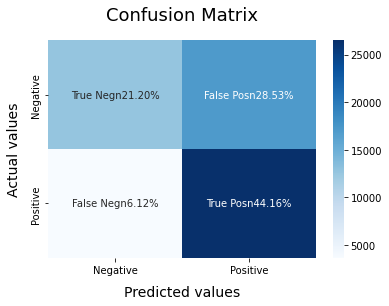

In [ ]:
AdaBoost_Model = AdaBoostClassifier()
AdaBoost_Model.fit(x_train, y_train)
model_Evaluate(AdaBoost_Model)
#y_pred2 = AdaBoost_Model.predict(x_test)

Train confusion matrix is: 
[[30144 40019]
 [ 8264 61573]]

Test confusion matrix is: 
[[12720 17117]
 [ 3669 26494]]

              precision    recall  f1-score   support

           0       0.78      0.43      0.55     29837
           1       0.61      0.88      0.72     30163

    accuracy                           0.65     60000
   macro avg       0.69      0.65      0.63     60000
weighted avg       0.69      0.65      0.63     60000


Train accuracy score:  0.6551214285714285
Test accuracy score:  0.6535666666666666

Train ROC-AUC score:  0.7320233576793043
Test ROC-AUC score:  0.727959178497126

Area under Precision-Recall curve: 0.7182476211131292
Area under ROC-AUC: 0.7383232488022912


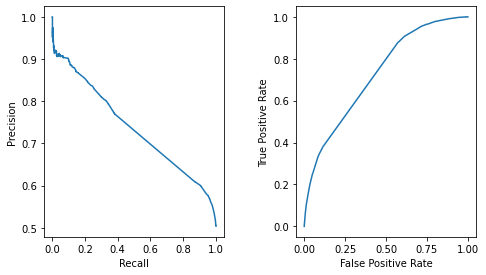

In [ ]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=plot_auc_roc(AdaBoost_Model,x_train,x_test, y_train, y_test)

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50,100,200]
             }


DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [ ]:
print(grid_search_ABC)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=42)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')


              precision    recall  f1-score   support

           0       0.70      0.69      0.70     29837
           1       0.70      0.70      0.70     30163

    accuracy                           0.70     60000
   macro avg       0.70      0.70      0.70     60000
weighted avg       0.70      0.70      0.70     60000



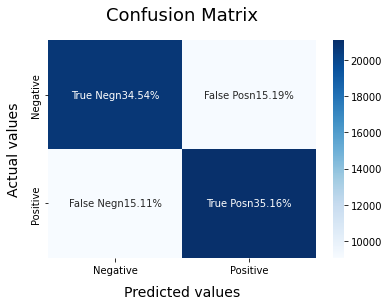

In [ ]:
grid_search_ABC.fit(x_train, y_train)
model_Evaluate(grid_search_ABC)

In [ ]:
# save the model to disk
import pickle
filename = 'Adaboost_final.sav'
pickle.dump(grid_search_ABC, open(filename, 'wb'))
 


In [ ]:
# some time later...
 
# load the model from disk
filename = 'Adaboost_final.sav'

loaded_model = pickle.load(open(filename, 'rb'))

print(loaded_model)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=42)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')


In [ ]:
print(loaded_model.best_params_)

{'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 200}


Train confusion matrix is: 
[[69349   814]
 [  259 69578]]

Test confusion matrix is: 
[[20723  9114]
 [ 9065 21098]]

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     29837
           1       0.70      0.70      0.70     30163

    accuracy                           0.70     60000
   macro avg       0.70      0.70      0.70     60000
weighted avg       0.70      0.70      0.70     60000


Train accuracy score:  0.9923357142857143
Test accuracy score:  0.6970166666666666

Train ROC-AUC score:  0.9998608812864805
Test ROC-AUC score:  0.7562866025319362

Area under Precision-Recall curve: 0.6988985507246377
Area under ROC-AUC: 0.7446777094672161


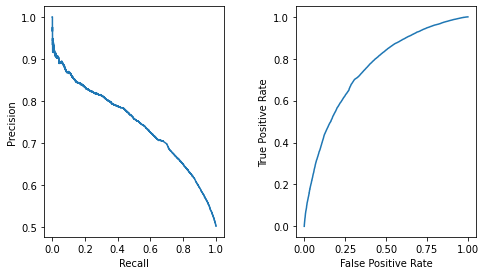

In [ ]:
a_train_accuracy, a_test_accuracy, a_train_auc, a_test_auc=plot_auc_roc(loaded_model,x_train,x_test, y_train, y_test)

## Logistic Regression

Logistic Regression Model with 5 fold CV

In [ ]:
logreg = LogisticRegressionCV(Cs=2,max_iter = 1000,scoring = 'accuracy',cv =5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.71      0.71      0.71     29837
           1       0.71      0.72      0.72     30163

    accuracy                           0.71     60000
   macro avg       0.71      0.71      0.71     60000
weighted avg       0.71      0.71      0.71     60000



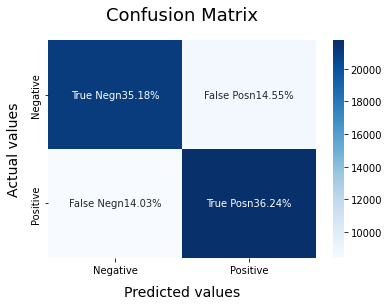

In [ ]:
logreg.fit(x_train, y_train)
model_Evaluate(logreg)


Train confusion matrix is: 
[[61842  8321]
 [ 7679 62158]]

Test confusion matrix is: 
[[21109  8728]
 [ 8418 21745]]

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     29837
           1       0.71      0.72      0.72     30163

    accuracy                           0.71     60000
   macro avg       0.71      0.71      0.71     60000
weighted avg       0.71      0.71      0.71     60000


Train accuracy score:  0.8857142857142857
Test accuracy score:  0.7142333333333334

Train ROC-AUC score:  0.9590212433133498
Test ROC-AUC score:  0.7556527471531546

Area under Precision-Recall curve: 0.7172306880401083
Area under ROC-AUC: 0.7172504072271002


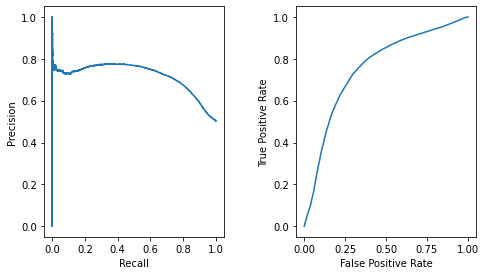

In [ ]:
lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc=plot_auc_roc(logreg,x_train,x_test, y_train, y_test)